<a href="https://colab.research.google.com/github/sushmakondeti2729/Amazon-Business-Research-/blob/main/MM3425_Indi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'amazon-business-research-analyst-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2566966%2F4449745%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240605%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240605T182826Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3a61bad9465c13cb3aa769e9bf59c4f8bba7d9fd4e370d1fbd04522f026f79326cede54c131ea46d76b88beb8dbc148b05f8397579402e4c2f891979acaefe73c8e197a0d5c8c91f4402a40f603b714900cbbca706071d411950770d55e55f58e4e0f2036739b75d013dbe958d5bebb10d3409cffbcfba4170e76d12821d16bce1fdcd547cf4ab757249b119c293f40186e8aae19e6702989425efdc997b0e95190fe1e31ac09877600fc451f22a1a07f6a82a5d89e3c64853ece54a8ed522de8ccdf2a1266ae863f3be6c8aace160cb85109fc45daadc7c56d8527ccebf1857669d54f8a4e44f935d593abc6399ae5bf17db2ffa1e7ad9bcf6f2c81032d4963'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 799412 bytes downloaded
Downloaded and uncompressed: amazon-business-research-analyst-dataset
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-business-research-analyst-dataset/cleaned_test.csv
/kaggle/input/amazon-business-research-analyst-dataset/encoded_cleaned_test.csv
/kaggle/input/amazon-business-research-analyst-dataset/updated.csv


In [3]:
deliveryup_df = pd.read_csv('/kaggle/input/amazon-business-research-analyst-dataset/updated.csv')
deliveryup_df

,Unnamed: 0,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,1,0x4607_x,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,11:30,11:45,4,0,2,3,3,0.0,1,3,24.0
1,2,0xb379_x,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,19:45,19:50,3,1,2,3,4,1.0,1,1,33.0
2,3,0x20f7_x,BANGRES18DEL01,37,4.4,12.913041,77.683237,12.953041,77.723237,13:50,13:55,6,0,0,0,3,2.0,1,1,42.0
3,4,0x7804_x,HYDRES13DEL02,28,4.9,17.431477,78.400350,17.451477,78.420350,10:60,11:15,2,2,1,2,4,1.0,1,3,19.0
4,5,0x7faf_x,RANCHIRES07DEL01,37,4.6,23.359407,85.325055,23.429407,85.395055,23:50,23:60,3,2,0,2,3,1.0,1,1,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2437,2438,0xcafe_y,ALHRES13DEL02,32,4.8,25.451646,81.832796,25.581646,81.962796,22:15,22:25,3,2,2,0,4,1.0,1,4,29.0
2438,2439,0x8c03_y,COIMBRES09DEL01,34,5.0,11.008638,76.984311,11.078638,77.054311,18:30,18:45,2,3,1,0,3,1.0,1,3,22.0
2439,2440,0xceec_y,KNPRES04DEL03,37,4.6,26.471529,80.313458,26.501529,80.343458,17:50,17:60,1,3,0,0,3,1.0,1,1,28.0
2440,2441,0x38c6_x,JAPRES11DEL01,24,4.8,26.902940,75.793007,26.942940,75.833007,13:20,13:25,6,0,2,2,2,0.0,1,3,12.0


In [4]:
deliveryup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   2442 non-null   int64  
 1   ID                           2442 non-null   object 
 2   Delivery_person_ID           2442 non-null   object 
 3   Delivery_person_Age          2442 non-null   int64  
 4   Delivery_person_Ratings      2348 non-null   float64
 5   Restaurant_latitude          2442 non-null   float64
 6   Restaurant_longitude         2442 non-null   float64
 7   Delivery_location_latitude   2442 non-null   float64
 8   Delivery_location_longitude  2442 non-null   float64
 9   Time_Orderd                  2353 non-null   object 
 10  Time_Order_picked            2442 non-null   object 
 11  Weatherconditions            2442 non-null   int64  
 12  Road_traffic_density         2442 non-null   int64  
 13  Vehicle_condition 

**Data transformation and cleaning**

In [5]:
#Drop rows which contains any missing value for the data set
deliveryup_df.dropna(inplace=True)
deliveryup_df.isnull().sum()

Unnamed: 0                     0
ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [6]:
# shows no. of rows remain after dropping missing value
print(deliveryup_df)

      Unnamed: 0        ID Delivery_person_ID  Delivery_person_Age  \
0              1  0x4607_x     INDORES13DEL02                   37   
1              2  0xb379_x     BANGRES18DEL02                   34   
2              3  0x20f7_x     BANGRES18DEL01                   37   
3              4  0x7804_x      HYDRES13DEL02                   28   
4              5  0x7faf_x   RANCHIRES07DEL01                   37   
...          ...       ...                ...                  ...   
2437        2438  0xcafe_y      ALHRES13DEL02                   32   
2438        2439  0x8c03_y    COIMBRES09DEL01                   34   
2439        2440  0xceec_y      KNPRES04DEL03                   37   
2440        2441  0x38c6_x      JAPRES11DEL01                   24   
2441        2442    0xdf0d      DEHRES18DEL03                   26   

      Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  \
0                         4.9            22.745049             75.892471   
1      

In [7]:
# merging dataframes into the table I want
deliveryup_df = deliveryup_df.reindex(columns=['Time_taken(min)','Delivery_person_Age', 'Weatherconditions','Road_traffic_density','Vehicle_condition','Delivery_person_Ratings'])
deliveryup_df = deliveryup_df.sort_values(by=['Time_taken(min)'], ascending=True)
deliveryup_df

,Time_taken(min),Delivery_person_Age,Weatherconditions,Road_traffic_density,Vehicle_condition,Delivery_person_Ratings
2137,10.0,28,3,3,0,4.7
23,10.0,29,3,2,1,4.9
1338,10.0,20,3,2,2,4.8
1710,10.0,22,4,0,1,4.9
81,10.0,20,4,3,2,4.7
...,...,...,...,...,...,...
973,53.0,39,2,1,0,4.4
2076,53.0,36,3,1,0,4.2
384,53.0,26,4,0,0,4.2
1727,54.0,32,1,1,0,4.9


**Descriptive Statistics**

In [8]:
deliveryup_df.describe()

,Time_taken(min),Delivery_person_Age,Weatherconditions,Road_traffic_density,Vehicle_condition,Delivery_person_Ratings
count,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000
mean,26.622436,29.515495,2.634657,1.689655,0.969446,4.626888
std,9.358144,5.730033,1.962888,0.943918,0.816816,0.310714
min,10.000000,20.000000,0.000000,0.000000,0.000000,2.500000
25%,20.000000,25.000000,1.000000,1.000000,0.000000,4.500000
50%,26.000000,30.000000,2.000000,2.000000,1.000000,4.700000
75%,32.000000,35.000000,4.000000,2.000000,2.000000,4.800000
max,54.000000,39.000000,6.000000,3.000000,2.000000,5.000000


In [9]:
#calculating mean, standard deviation, max, min, quartiles, percentiles

print(deliveryup_df['Time_taken(min)'].mean())
print(deliveryup_df['Time_taken(min)'].std())
print(deliveryup_df['Time_taken(min)'].median())
print(deliveryup_df['Time_taken(min)'].max())
print(deliveryup_df['Time_taken(min)'].min())
print(deliveryup_df['Time_taken(min)'].quantile([0.25, 0.50, 0.75]))

26.62243561763422
9.358143519686223
26.0
54.0
10.0
0.25    20.0
0.50    26.0
0.75    32.0
Name: Time_taken(min), dtype: float64


**Distribution analysis**

array([[<Axes: title={'center': 'Time_taken(min)'}>,
        <Axes: title={'center': 'Delivery_person_Age'}>],
       [<Axes: title={'center': 'Weatherconditions'}>,
        <Axes: title={'center': 'Road_traffic_density'}>],
       [<Axes: title={'center': 'Vehicle_condition'}>,
        <Axes: title={'center': 'Delivery_person_Ratings'}>]],
      dtype=object)

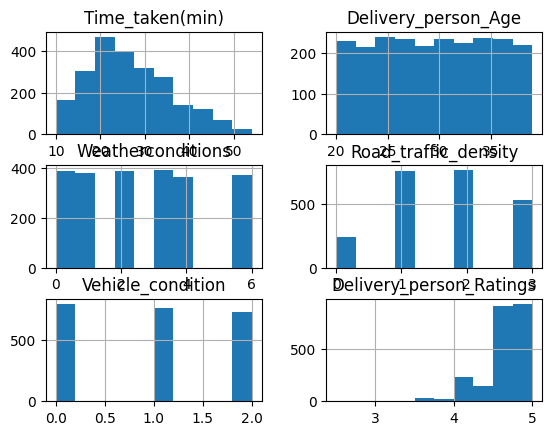

In [10]:
# draw histograms of numerical fields
deliveryup_df.hist()

<Axes: ylabel='Time_taken(min)'>

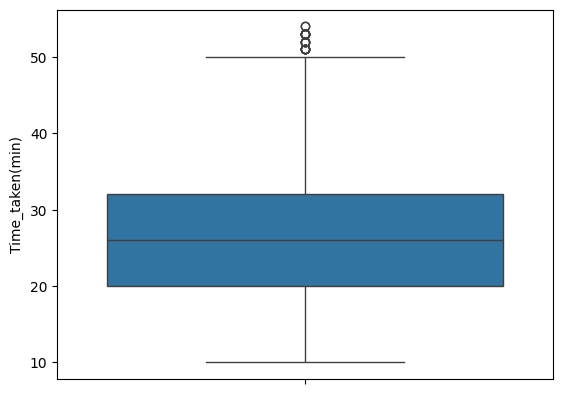

In [11]:
import seaborn as sns
sns.boxplot(data=deliveryup_df, y='Time_taken(min)', orient='v')

**Tabulation and visualization**

In [12]:
#creating pivot tables

deliveryup_crosstab = pd.pivot_table(deliveryup_df, values='Delivery_person_Ratings' , index=['Delivery_person_Age'], columns=['Time_taken(min)'], aggfunc='count', fill_value=0)
deliveryup_crosstab

Time_taken(min),10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,...,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0
Delivery_person_Age,,,,,,,,,,,,,,,,,,,,,
20,5,5,1,2,6,3,9,3,2,4,...,0,1,0,0,0,0,0,0,0,0
21,1,7,5,2,5,8,3,6,5,6,...,1,0,1,2,0,0,0,2,0,0
22,4,4,3,1,0,7,4,5,4,7,...,0,0,2,0,1,0,0,1,0,0
23,3,2,7,0,3,4,3,4,4,10,...,0,0,0,0,0,0,0,0,0,0
24,4,1,4,4,2,0,1,7,7,5,...,0,0,1,0,1,0,0,0,0,0
25,4,2,2,1,3,5,9,4,4,10,...,0,1,0,0,0,0,1,0,0,0
26,3,2,2,1,5,4,5,6,8,5,...,1,1,0,1,1,0,0,0,1,0
27,2,3,3,2,4,3,4,9,11,7,...,0,0,0,1,0,0,0,0,0,0
28,5,7,4,1,4,6,3,5,7,6,...,0,1,0,0,0,0,0,0,1,0


<Axes: xlabel='Delivery_person_Age', ylabel='Time_taken(min)'>

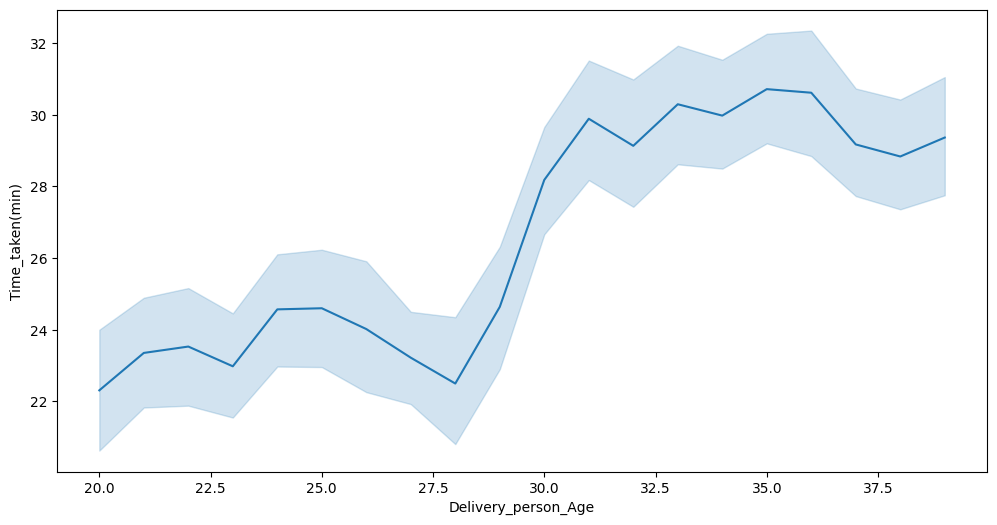

In [13]:
# drawing line plot

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

sns.lineplot(data=deliveryup_df, x="Delivery_person_Age", y="Time_taken(min)")

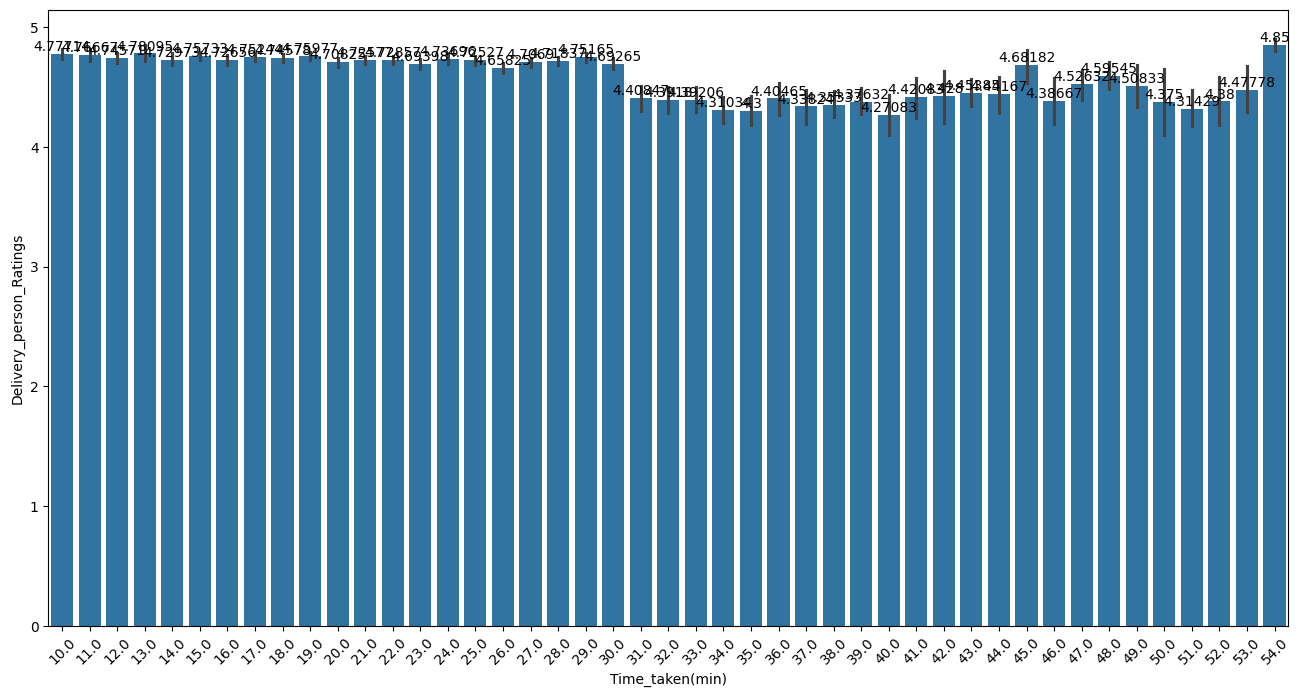

In [14]:
# drawing bar plot

plt.figure(figsize=(16,8))

ax = sns.barplot(data=deliveryup_df, x='Time_taken(min)', y='Delivery_person_Ratings')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)

plt.show()

**Regression analysis**

In [15]:
#calculating correlation coefficient
import statsmodels.api as sm
dependent_df = deliveryup_df[['Time_taken(min)']]
dependent_df
sm.add_constant(dependent_df, prepend=True)

,const,Time_taken(min)
2137,1.0,10.0
23,1.0,10.0
1338,1.0,10.0
1710,1.0,10.0
81,1.0,10.0
...,...,...
973,1.0,53.0
2076,1.0,53.0
384,1.0,53.0
1727,1.0,54.0


In [16]:
independent_df = deliveryup_df[['Delivery_person_Age']]
independent_df
sm.add_constant(independent_df, prepend=True)

,const,Delivery_person_Age
2137,1.0,28
23,1.0,29
1338,1.0,20
1710,1.0,22
81,1.0,20
...,...,...
973,1.0,39
2076,1.0,36
384,1.0,26
1727,1.0,32


In [17]:
import statsmodels.api as sm

mod_log = sm.OLS(dependent_df['Time_taken(min)'], independent_df)
res_log = mod_log.fit()
display(res_log.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Time_taken(min)   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                          1.890e+04
Date:                Wed, 05 Jun 2024   Prob (F-statistic):                        0.00
Time:                        18:29:05   Log-Likelihood:                         -8353.8
No. Observations:                2291   AIC:                                  1.671e+04
Df Residuals:                    2290   BIC:                                  1.672e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Delivery_person_Age     0.8864      0.006    137.488      0.000       0.874       0.899
==============================================================================
Omnibus:                       90.250   Durbin-Watson:                   0.546
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.402
Skew:                           0.512   Prob(JB):                     1.58e-22
Kurtosis:                       3.063   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Delivery_person_Age', ylabel='Time_taken(min)'>

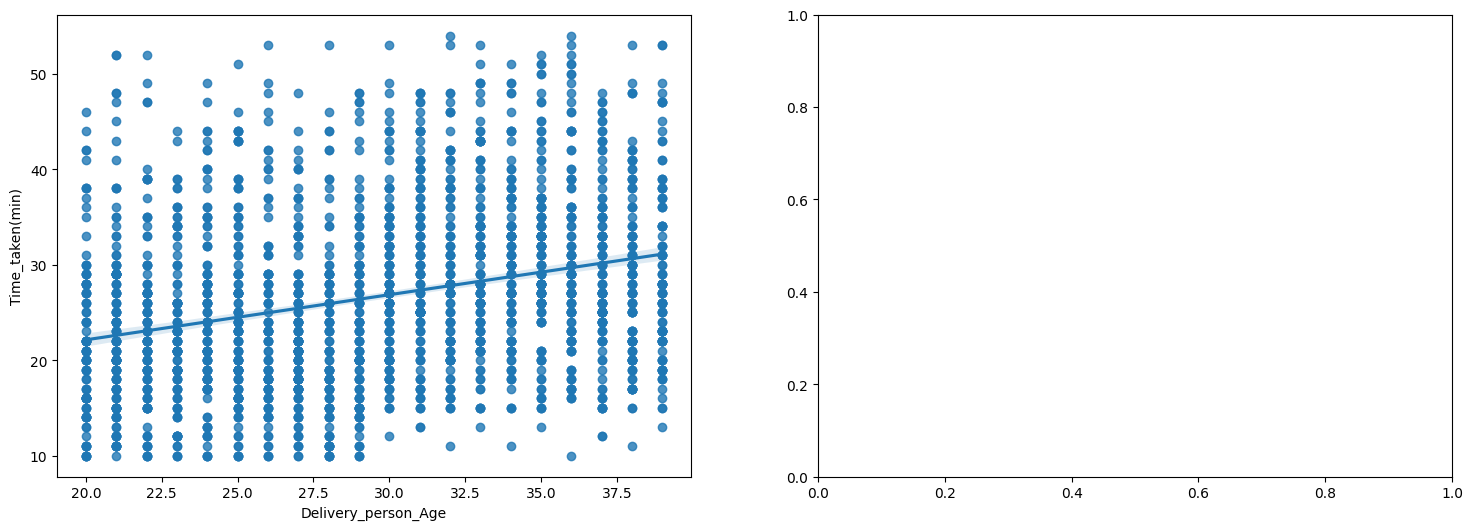

In [18]:
fig, axs = plt.subplots(1,2, figsize=(18, 6))

sns.regplot(x=independent_df['Delivery_person_Age'], y=dependent_df['Time_taken(min)'], ax=axs[0])

Slope: 0.47250637170224746
Intercept: 12.676175969224804


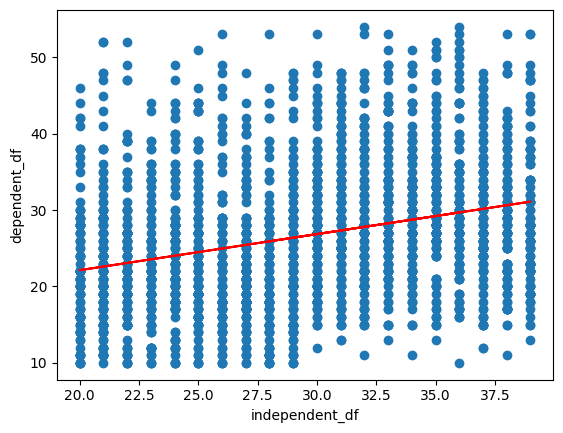

In [19]:
#finding regression lines

from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(independent_df['Delivery_person_Age'], dependent_df['Time_taken(min)'])

print("Slope:", slope)
print("Intercept:", intercept)

plt.scatter(independent_df['Delivery_person_Age'], dependent_df['Time_taken(min)'])
plt.plot(independent_df['Delivery_person_Age'], intercept + slope * independent_df['Delivery_person_Age'], 'r')
plt.xlabel('independent_df')
plt.ylabel('dependent_df')
plt.show()

In [20]:
independent_df = deliveryup_df[['Delivery_person_Age','Road_traffic_density','Vehicle_condition']]
independent_df
sm.add_constant(independent_df, prepend=True)


,const,Delivery_person_Age,Road_traffic_density,Vehicle_condition
2137,1.0,28,3,0
23,1.0,29,2,1
1338,1.0,20,2,2
1710,1.0,22,0,1
81,1.0,20,3,2
...,...,...,...,...
973,1.0,39,1,0
2076,1.0,36,1,0
384,1.0,26,0,0
1727,1.0,32,1,0


In [21]:
import statsmodels.api as sm

mod_log = sm.OLS(dependent_df['Time_taken(min)'], independent_df)
res_log = mod_log.fit()
display(res_log.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Time_taken(min)   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.897
Method:                 Least Squares   F-statistic:                              6616.
Date:                Wed, 05 Jun 2024   Prob (F-statistic):                        0.00
Time:                        18:29:08   Log-Likelihood:                         -8302.9
No. Observations:                2291   AIC:                                  1.661e+04
Df Residuals:                    2288   BIC:                                  1.663e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Delivery_person_Age      1.0005      0.014     72.897      0.000       0.974       1.027
Road_traffic_density    -1.0040      0.191     -5.253      0.000      -1.379      -0.629
Vehicle_condition       -1.8623      0.226     -8.238      0.000      -2.306      -1.419
==============================================================================
Omnibus:                       65.946   Durbin-Watson:                   0.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.308
Skew:                           0.432   Prob(JB):                     3.28e-16
Kurtosis:                       2.960   Cond. No.                         36.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
#another method to get the regression result with three independent variables

import statsmodels.api as sm
linear_mod = sm.OLS(dependent_df['Time_taken(min)'], independent_df)
linear_res = linear_mod.fit()
print(linear_res.summary())

                                 OLS Regression Results                                
Dep. Variable:        Time_taken(min)   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.897
Method:                 Least Squares   F-statistic:                              6616.
Date:                Wed, 05 Jun 2024   Prob (F-statistic):                        0.00
Time:                        18:29:09   Log-Likelihood:                         -8302.9
No. Observations:                2291   AIC:                                  1.661e+04
Df Residuals:                    2288   BIC:                                  1.663e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

**Forecasting**

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

print(deliveryup_df['Delivery_person_Age'].values[0]) # value at row 0
print(deliveryup_df['Delivery_person_Age'].values[1]) # value at row 1
print(deliveryup_df['Delivery_person_Age'].values[2]) # value at row 2


28
29
20


In [24]:
print(deliveryup_df['Delivery_person_Age'] - deliveryup_df['Delivery_person_Age'].values[0])

2137     0
23       1
1338    -8
1710    -6
81      -8
        ..
973     11
2076     8
384     -2
1727     4
882      8
Name: Delivery_person_Age, Length: 2291, dtype: int64


In [25]:
import statsmodels.api as sm

independent_df = deliveryup_df[['Delivery_person_Age']]
independent_df
sm.add_constant(independent_df, prepend=True)

# Obtain all parameters related to the prediction from quad_res by calling get_prediction().summary_frame()
linear_pred = linear_res.get_prediction().summary_frame()

linear_pred.columns = ['pred_time', 'pred_se', 'ci_lower', 'ci_upper', 'pi_lower', 'pi_upper']

linear_pred[['obs_time', 'Delivery_person_Age']] = deliveryup_df[['Time_taken(min)', 'Delivery_person_Age']]

display(linear_pred.head())
display(linear_pred.tail())

,pred_time,pred_se,ci_lower,ci_upper,pi_lower,pi_upper,obs_time,Delivery_person_Age
2137,25.000961,0.397706,24.221058,25.780863,7.181980,42.819941,10.0,28
23,25.143129,0.198531,24.753810,25.532448,7.336968,42.949290,10.0,29
1338,14.276656,0.362903,13.565002,14.988309,-3.539468,32.092779,10.0,20
1710,20.147896,0.284244,19.590493,20.705300,2.337267,37.958525,10.0,22
81,13.272650,0.472395,12.346284,14.199016,-4.553341,31.098641,10.0,20


,pred_time,pred_se,ci_lower,ci_upper,pi_lower,pi_upper,obs_time,Delivery_person_Age
973,38.014071,0.418620,37.193157,38.834986,20.193249,55.834894,53.0,39
2076,35.012681,0.379777,34.267938,35.757424,17.195205,52.830157,53.0,36
384,26.012052,0.356832,25.312304,26.711799,8.196400,43.827704,53.0,26
1727,31.010827,0.328868,30.365916,31.655738,13.197244,48.824409,54.0,32
882,35.012681,0.379777,34.267938,35.757424,17.195205,52.830157,54.0,36


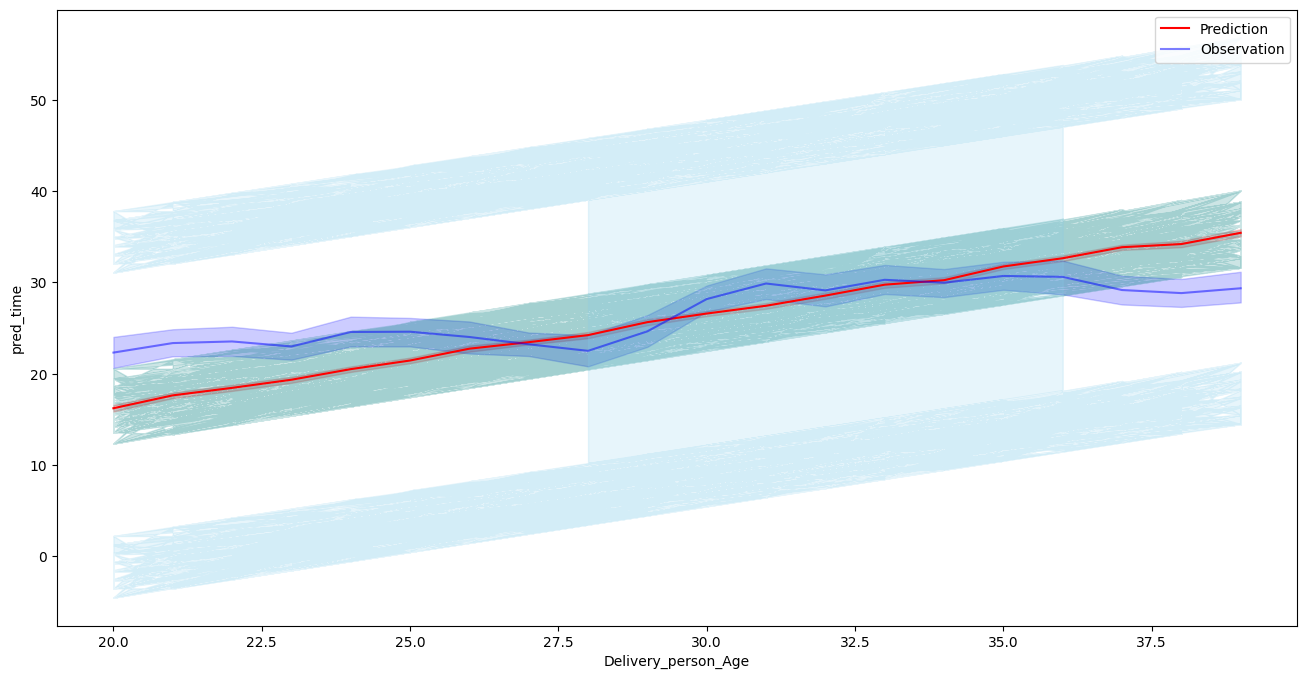

In [26]:
def regression_plot(plot_data):
    plt.figure(figsize=(16,8))
    # Use the seaborn.lineplot() method to plot the curvilinear regression line between 'obesity' and 'happiness' in plot_data
    sns.lineplot(data=plot_data, x='Delivery_person_Age', y='pred_time', color='red', label='Prediction')

    # Use the seaborn.scatterplot() method to plot the observced data points for 'obesity' and 'happiness' in plot_data
    sns.lineplot(data=plot_data, x='Delivery_person_Age', y='obs_time', color='blue', alpha=0.5, label='Observation')

    # Use the matplotlib.pyplot.fill_between() method to fill between the lower and the upper bounds of confidence interval (ci_lower, ci_upper)
    plt.fill_between(x=plot_data['Delivery_person_Age'], y1=plot_data['ci_lower'], y2=plot_data['ci_upper'], color='teal', alpha=0.2)

    # Use the matplotlib.pyplot.fill_between() method to fill between the lower and the upper bounds of prediction interval (pi_lower, pi_upper)
    plt.fill_between(x=plot_data['Delivery_person_Age'], y1=plot_data['pi_lower'], y2=plot_data['pi_upper'], color='skyblue', alpha=0.2)

regression_plot(linear_pred)

In [27]:
def forecast_accuracy(df, obs, pred):
    mfe = (df[obs] - df[pred]).mean()
    mae = abs(df[obs] - df[pred]).mean()
    mse = ((df[obs] - df[pred]) ** 2).mean()
    mape = (((df[obs] - df[pred]) / df[obs]) * 100).mean()

    return 'Mean Forcasting Error (MFE): '+str(mfe)+\
           '\nMean Absolute Error (MAE): '+str(mae)+\
           '\nMean Squared Error (MSE): '+str(mse)+\
           '\nMean Absolute Percentage Error (MAPE): '+str(mape)

print(forecast_accuracy(linear_pred, 'obs_time', 'pred_time'))

Mean Forcasting Error (MFE): 0.595082911995513
Mean Absolute Error (MAE): 7.218801281946337
Mean Squared Error (MSE): 82.30156242459405
Mean Absolute Percentage Error (MAPE): -7.7188386236286455


In [28]:
linear_res.get_prediction().summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
2137,25.000961,0.397706,24.221058,25.780863,7.181980,42.819941
23,25.143129,0.198531,24.753810,25.532448,7.336968,42.949290
1338,14.276656,0.362903,13.565002,14.988309,-3.539468,32.092779
1710,20.147896,0.284244,19.590493,20.705300,2.337267,37.958525
81,13.272650,0.472395,12.346284,14.199016,-4.553341,31.098641
...,...,...,...,...,...,...
973,38.014071,0.418620,37.193157,38.834986,20.193249,55.834894
2076,35.012681,0.379777,34.267938,35.757424,17.195205,52.830157
384,26.012052,0.356832,25.312304,26.711799,8.196400,43.827704
1727,31.010827,0.328868,30.365916,31.655738,13.197244,48.824409
